# HW3 - solution

# 1. proportional-integral control

This problem considers the following standard negative feedback block diagram.

![negative feedback block diagram](http://faculty.washington.edu/sburden/447/447-hw1-feedback.png)

***Purpose:*** you will analyze and synthesize a ***proportional-integral*** controller
$$ C(s) = k_P + k_I/s \iff u(t) = k_P e(t) + k_I \int_0^t e(\tau) d\tau $$
for the purpose of ***reference tracking***.  Specifically, you'll apply this controller to a first-order process model $P(s) = b / (s + a)$ to obtain the closed-loop transfer function $G_{yr}$.

**We seek to tune the controller parameters $k_P, k_I$ to obtain complex-conjugate roots $-\sigma_d \pm j \omega_d$ for the closed-loop system, i.e. we want the characteristic polynomial of $G_{yr}$ to be
$$ (s + \sigma_d + j \omega_d) (s + \sigma_d - j \omega_d) = s^2 + 2\sigma_d s + \sigma_d^2 + \omega_d^2. $$

a. By matching coefficients that multiply the same power of the variable $s$ in the actual and desired characteristic polynomials, express $k_P$ and $k_I$ in terms of $\sigma_d,\omega_d,a,b$.

**Solution:**
First, find the transfer function $G_{yr}(s)$. According to the block diagram:\
$(C(s)(r-y)+v)P(s)=y$\
$\iff (PC+1)y=PCr+Pv$ (omitting (s))\
$\Rightarrow y= \cfrac{PC}{1+PC}r$\
$\Rightarrow G_{yr}(s) = \cfrac{P(s)C(s)}{1+P(s)C(s)}$\
Plug in $P = \cfrac{b}{s+a}, C = \cfrac{k_Ps+k_I}{s}$\
$\Rightarrow G_{yr}(s) = \cfrac{k_Pbs+k_Ib}{s^2+(a+k_Pb)s+k_Ib}$

From the transfer function, we know the characteristic polynomial:
$a(s)=s^2+(a+bk_P)s+bk_I$.\
On matching coefficients with the desired polynomial, we have $\fbox{$k_I= \cfrac{\sigma_d^2 +\omega_d^2}{b}$}$.\
Similarly, $2\sigma_d=(a+bk_P) \Rightarrow \fbox{$k_P=\cfrac{2\sigma_d-a}{b}$}$ as the desired parameters.

--------------------------------

b. Use a numerical simulation of this closed-loop system with parameters $a = 1$, $b = 1$ to plot this system's ***step response*** (that is, the output corresponding to a reference $r(t)$ that is equal to zero for $t < 0$ and equal to $1$ for $t \geq 0$). Run this simulation three times, using combinations of $\sigma_d$, $\omega_d$ such that:
(1) $k_P$ and $k_I$ are both approximately equal to 1
(2) $k_I$ is roughly 10 times larger than $k_I$
(3) $k_P$ > 100
Generate a plot that shows each of these three step responses, and be sure to include the calculated values of $k_I$ and $k_P$ for each trajectory in the figure legend. Qualitatively describe the behavior of each of these step responses. What do you notice about how the system behavior responds to different values of $k_P$ and $k_I$?

**Solution:**
According to the transfer function
$G_{yr}(s) = \cfrac{k_Pbs+k_Ib}{s^2+(a+k_Pb)s+k_Ib}$\
Write it into DE format:
$\frac{d}{dt}\left[\begin{matrix} y \\ \dot{y} \end{matrix}\right] = \left[\begin{matrix} 0 & 1 \\ -k_Ib & -a-k_Pb \end{matrix}\right]\left[\begin{matrix} y \\ \dot{y} \end{matrix}\right] + \left[\begin{matrix} 0 & 0 \\ k_Ib & k_P b \end{matrix}\right] \left[\begin{matrix} r \\ \dot{r} \end{matrix}\right]$.

You can also note that $\dot{r} = 0$ for a step input, and could simplify the system to: 
$\frac{d}{dt}\left[\begin{matrix} y \\ \dot{y} \end{matrix}\right] = \left[\begin{matrix} 0 & 1 \\ -k_Ib & -a-k_Pb \end{matrix}\right]\left[\begin{matrix} y \\ \dot{y} \end{matrix}\right] + \left[\begin{matrix} 0  \\ k_Ib \end{matrix}\right] r$.

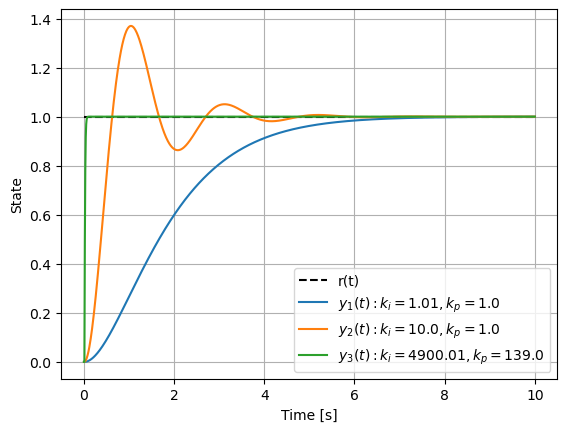

In [47]:
### Solution provided without using numerical_simulation() function and using full A & B matrices: 
import numpy as np
import matplotlib.pyplot as plt

# System parameters
a = 1.0
b = 1.0

# Time parameters
dt = 0.01  # Time step
t_total = 10     # Total simulation time
N = int(t_total/dt) # Number of samples

# Input r = (r, r_dot) -- could recognize that r_dot = 0 for a step input and remove
r = np.array([np.ones(N), 
            np.gradient(np.ones(N), dt)])

# define A and B matrices that are a function of k_P and k_I 
def A(k_P, k_I): 
    A = np.array([[0, 1],
                  [-k_I * b, -a - k_P * b]])
    return A

def B(k_P, k_I): 
    B = np.array([[0, 0],
                  [k_I * b, k_P * b]]) # -- could recognize that r_dot = 0 for a step input and remove first column of B
    return B

y0 = np.array([0,0])

def simulate_DE(A_mat, B_mat, dt, x0, u):
  # Initialize state arrays: x = (y, y_dot)
    x = np.array([np.zeros(N),
                   np.zeros(N)])

    # specify initial conditions 
    x[:,0] = x0

  # Euler's method
    for i in range(1, N):
        # State vector 
        x_vec = x[:,i-1]
        
        # Reference vector
        u_vec = u[:,i-1]
        
        # Compute derivative of state vector
        dx_dt = A_mat @ x_vec + B_mat @ u_vec

        # Update state using Euler's method
        x_next = x_vec + dx_dt * dt

        # Store the results
        x[:,i] = x_next
    return x

## (1) k_i = k_p
sig = 1
omg = 0.1
k_I_1 = (sig**2 + omg**2)/b
k_P_1 = (2*sig - a)/b

y_1 = simulate_DE(A(k_P_1, k_I_1), B(k_P_1, k_I_1), dt, y0, r)

## (2) k_i = 10*k_p
sig = 1
omg = 3
k_I_2 = (sig**2 + omg**2)/b
k_P_2 = (2*sig - a)/b
y_2 = simulate_DE(A(k_P_2, k_I_2), B(k_P_2, k_I_2), dt, y0, r)

## (3) k_p > 100
sig = 70
omg = 0.1
k_I_3 = (sig**2 + omg**2)/b
k_P_3 = (2*sig - a)/b
y_3 = simulate_DE(A(k_P_3, k_I_3), B(k_P_3, k_I_3), dt, y0, r)


# Plot the results
plt.figure()
t = np.linspace(0, t_total, N)
plt.plot(t, r[0],'k--',label='r(t)')
plt.plot(t, y_1[0], label='$y_1(t): k_i=' + str(k_I_1) + ', k_p=' + str(k_P_1) + '$')
plt.plot(t, y_2[0], label='$y_2(t): k_i=' + str(k_I_2) + ', k_p=' + str(k_P_2) + '$')
plt.plot(t, y_3[0], label='$y_3(t): k_i=' + str(k_I_3) + ', k_p=' + str(k_P_3) + '$')
plt.xlabel('Time [s]')
plt.ylabel('State')
plt.legend()
plt.grid()
plt.show()




**According to the analysis from 1.b.(3) above, the convergence rate can be made arbitrarily fast (i.e. $\sigma_d$ can be made arbitrarily large) by making the controller parameters $k_P,k_I$ large. In practice, such *high-gain feedback* can excite *unmodeled dynamics* and lead to instability.**

**To see how this can happen, suppose unmodeled dynamics in $P(s)$ (e.g. dynamics of sensors, actuators, vibratory modes, electromagnetic coupling, etc.) have time constant $T > 0$ (assume $-1/T \ll -a$, so we were initially justified in neglecting these dynamics in our model because they are stable and converge much faster than the original modeled dynamics).  Including these dynamics yields the process model**

$$ P(s) = \frac{b}{(s + a)(1 + sT)}. $$

c. Determine the characteristic polynomial of the closed-loop transfer function $G_{yr}$.

**Solution:**

By substituting the value of C(s) from 1a. and P(s) provided above, we can obtain the transfer function G_{yr}(s). For the closed-loop characteristic polynomial, we look at the denominator of G_{yr}(s), which is:   

$a(s) = s(s + a)(1+sT)+bk_Ps+bk_I$  
$ \Leftrightarrow a(s) = s^3T + (1 + aT)s^2 + (a+bk_P)s + bk_I$   


 -----------------------

d. Apply the *Routh-Hurwitz stability criterion* to determine algebraic conditions that must be satisfied by $a,b,k_P,k_I,T$ for the closed-loop system to be stable.

**Solution:**

$a(s)=s^3+(\cfrac{1}{T}+a)s^2+\cfrac{(a+bk_P)}{T}s + \cfrac{bk_I}{T}$

Using the Routh-Hurwitz criterion, $a_1,a_2,a_3 > 0$ and $a_1a_2 > a_3$

(1)$$\frac{1}{T}+a > 0$$  
(2)$$\frac{(a+bk_P)}{T} > 0$$  
(3)$$\frac{bk_I}{T} > 0$$  

and

(4)$$(\frac{1}{T}+a) \frac{(a+bk_P)}{T} > \frac{bk_I}{T}$$ $$ \Leftrightarrow \frac{(1+aT)(a+bk_P)}{bk_I} > T$$


-----------------------------

e. Validate your result from (d) using a numerical simulation of the closed-loop system with $a = 1$, $b = 1$, $T = 0.1$:  choose $k_P$, $k_I$ such that the Routh-Hurwitz criteria are (i) satisfied (so the closed-loop system is stable) and (ii) violated (so the closed-loop system is unstable), and provide plots showing the step response in these two cases.

**Solution:**
According to the transfer function
$G_{yr}(s) = \cfrac{\cfrac{k_Pb}{T}s+\cfrac{k_Ib}{T}}{s^3+\cfrac{aT+1}{T}s^2+\cfrac{a+k_Pb}{T}s+\cfrac{k_Ib}{T}}$\
Write it into DE format:
$\cfrac{d}{dt}\left[\begin{matrix} y \\ \dot{y} \\ \ddot{y} \end{matrix}\right] = 
\left[\begin{matrix} 0 & 1 & 0 \\ 0 & 0 & 1 \\ -\cfrac{k_Ib}{T} & -\cfrac{a+k_Pb}{T} & -\cfrac{aT+1}{T} \end{matrix}\right]
\left[\begin{matrix} y \\ \dot{y} \\ \ddot{y} \end{matrix}\right] +
\left[\begin{matrix} 0 & 0 \\ 0 & 0 \\ \cfrac{k_Ib}{T} & \cfrac{k_Pb}{T} \end{matrix}\right]
\left[\begin{matrix} r \\ \dot{r} \end{matrix}\right]
$\
Again, could recognize that $\dot{r}=0$ and simplify the system to: 
$\cfrac{d}{dt}\left[\begin{matrix} y \\ \dot{y} \\ \ddot{y} \end{matrix}\right] = 
\left[\begin{matrix} 0 & 1 & 0 \\ 0 & 0 & 1 \\ -\cfrac{k_Ib}{T} & -\cfrac{a+k_Pb}{T} & -\cfrac{aT+1}{T} \end{matrix}\right]
\left[\begin{matrix} y \\ \dot{y} \\ \ddot{y} \end{matrix}\right] +
\left[\begin{matrix} 0  \\ 0  \\ \cfrac{k_Ib}{T}\end{matrix}\right]
r$\
Then, numerically simulate the system. 

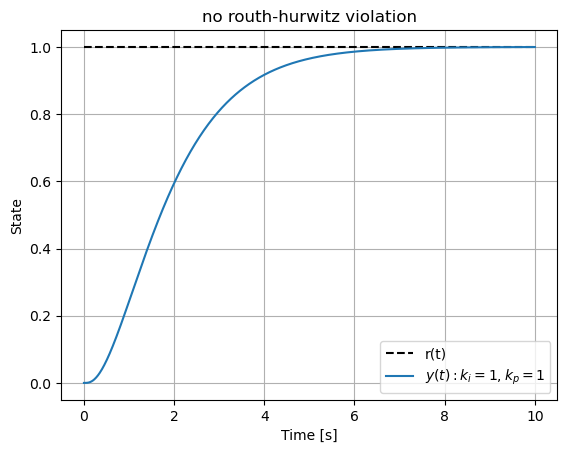

condition (4) violated


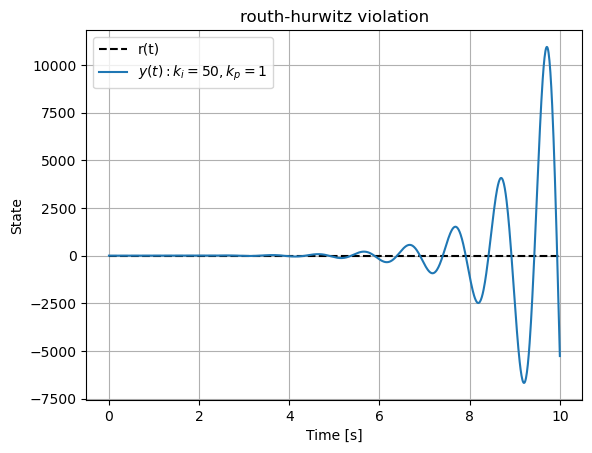

In [45]:
### solution 1e option 1: using code from solution 2b
import numpy as np
import matplotlib.pyplot as plt

# System parameters
a = 1.0
b = 1.0
T = 0.1
    
# Time parameters
dt = 0.01  # Time step
t_total = 10     # Total simulation time
N = int(t_total/dt) # Number of samples

# Input r = (r, r_dot) -- could recognize that r_dot = 0 for a step input and remove
r = np.array([np.ones(N), 
            np.gradient(np.ones(N), dt)])

# define A and B matrices that are a function of k_P and k_I 
def A(k_P, k_I): 
    A = np.array([[0, 1, 0],
              [0, 0, 1],
              [-k_I*b/T, -(a+k_P*b)/T, -(a*T + 1)/T]])
    return A

def B(k_P, k_I): 
    B = np.array([[0,0],
              [0,0],
              [k_I*b/T, k_P*b/T]]) # -- could recognize that r_dot = 0 for a step input and remove first column of B
    return B

y0 = np.array([0,0,0])

def simulate_DE(A_mat, B_mat, dt, x0, u):
  # Initialize state arrays: x = (y, y_dot)
    x = np.array([np.zeros(N),
                  np.zeros(N),
                  np.zeros(N)])

    # specify initial conditions 
    x[:,0] = x0

  # Euler's method
    for i in range(1, N):
        # State vector 
        x_vec = x[:,i-1]
        
        # Reference vector
        u_vec = u[:,i-1]
        
        # Compute derivative of state vector
        dx_dt = A_mat @ x_vec + B_mat @ u_vec

        # Update state using Euler's method
        x_next = x_vec + dx_dt * dt

        # Store the results
        x[:,i] = x_next
    return x

## (1) use k_i and k_p that satisfy Routh-Hurwitz criterion 
k_I = 1
k_P = 1

# check Routh-Hurwitz criterion
if (1/T + a) <= 0:
  print('condition (1) violated')
if (a+k_P*b)/T <= 0:
  print('condition (2) violated')
if k_I*b/T <= 0:
  print('condition (3) violated')
if (1/T + a)*(a+k_P*b) <= b* k_I :
  print('condition (4) violated')
    
y = simulate_DE(A(k_P, k_I), B(k_P, k_I), dt, y0, r)

# Plot the results
plt.figure()
t = np.linspace(0, t_total, N)
plt.plot(t, r[0],'k--',label='r(t)')
plt.plot(t, y[0], label='$y(t): k_i=' + str(k_I) + ', k_p=' + str(k_P) + '$')
plt.title('no routh-hurwitz violation')
plt.xlabel('Time [s]')
plt.ylabel('State')
plt.legend()
plt.grid()
plt.show()

## (2) use k_i and k_p that violate Routh-Hurwitz criterion
k_I = 50
k_P = 1

# check Routh-Hurwitz criterion
if (1/T + a) <= 0:
  print('condition (1) violated')
if (a+k_P*b)/T <= 0:
  print('condition (2) violated')
if k_I*b/T <= 0:
  print('condition (3) violated')
if (1/T + a)*(a+k_P*b) <= b* k_I :
  print('condition (4) violated')
    
y = simulate_DE(A(k_P, k_I), B(k_P, k_I), dt, y0, r)

# Plot the results
plt.figure()
t = np.linspace(0, t_total, N)
plt.plot(t, r[0],'k--',label='r(t)')
plt.plot(t, y[0], label='$y(t): k_i=' + str(k_I) + ', k_p=' + str(k_P) + '$')
plt.title('routh-hurwitz violation')
plt.xlabel('Time [s]')
plt.ylabel('State')
plt.legend()
plt.grid()
plt.show()

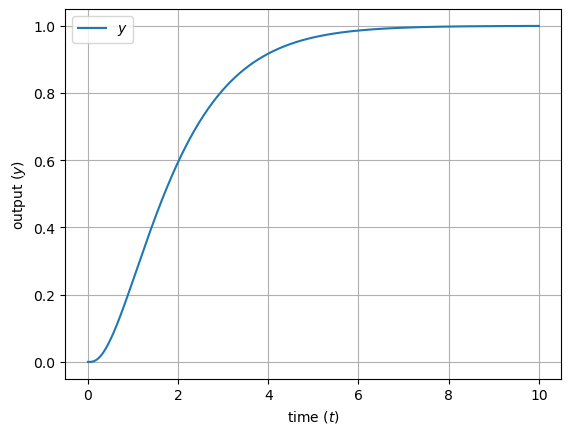

condition (4) violated


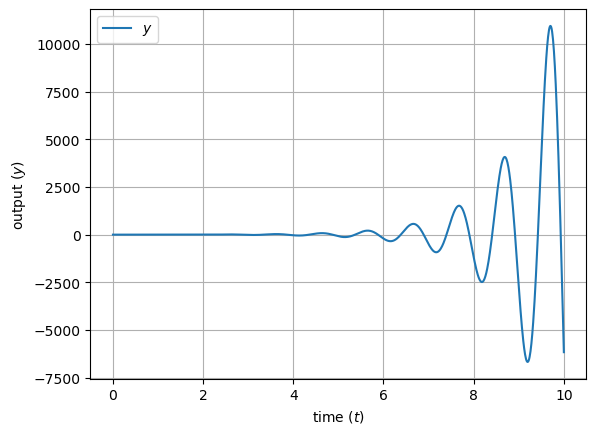

In [49]:
### solution 1e option 2: using numerical_simulation() function
# import modules first
import numpy as np
import pylab as plt
from scipy.integrate import solve_ivp

# build ODE solver ###################################################################################################
def numerical_simulation(f,t,x,t0=0.,dt=1e-4,ut=None,ux=None,utx=None,return_u=False):
  """
  simulate x' = f(x,u)

  input:
    f : R x X x U --> X - vector field
      X - state space (must be vector space)
      U - control input set
    t - scalar - final simulation time
    x - initial condition; element of X

    (optional:)
    t0 - scalar - initial simulation time
    dt - scalar - stepsize parameter
    return_u - bool - whether to return u_

    (only one of:)
    ut : R --> U
    ux : X --> U
    utx : R x X --> U

  output:
    t_ - N array - time trajectory
    x_ - N x X array - state trajectory
    (if return_u:)
    u_ - N x U array - state trajectory
  """
  t_,x_,u_ = [t0],[x],[]

  inputs = sum([1 if u is not None else 0 for u in [ut,ux,utx]])
  assert inputs <= 1, "more than one of ut,ux,utx defined"

  if inputs == 0:
    assert not return_u, "no input supplied"
  else:
    if ut is not None:
      u = lambda t,x : ut(t)
    elif ux is not None:
      u = lambda t,x : ux(x)
    elif utx is not None:
      u = lambda t,x : utx(t,x)

  while t_[-1]+dt < t:
    if inputs == 0:
      _t,_x = t_[-1],x_[-1]
      dx = f(t_[-1],x_[-1]) * dt
    else:
      _t,_x,_u = t_[-1],x_[-1],u(t_[-1],x_[-1])
      dx = f(_t,_x,_u) * dt
      u_.append( _u )

    x_.append( _x + dx )
    t_.append( _t + dt )

  if return_u:
    return np.asarray(t_),np.asarray(x_),np.asarray(u_)
  else:
    return np.asarray(t_),np.asarray(x_)
############################################################################################################

# begin code for problem e:
# first, use k_i and k_p that satisfy Routh-Hurwitz criterion -------------------
a = 1
b = 1

k_i = 1
k_p = 1

T = 0.1

# check Routh-Hurwitz criterion
if (1/T + a) <= 0:
  print('condition (1) violated')
if (a+k_p*b)/T <= 0:
  print('condition (2) violated')
if k_i*b/T <= 0:
  print('condition (3) violated')
if (1/T + a)*(a+k_p*b) <= b* k_i :
  print('condition (4) violated')

A = np.array([[0, 1, 0],
              [0, 0, 1],
              [-k_i*b/T, -(a+k_p*b)/T, -(a*T + 1)/T]])

B = np.array([[0],
              [0],
              [k_i*b/T]]) # recognizing that r_dot = 0 for a step input, so only considering first column of B

def f(t,x,u):
  #x1,x2 = x
  y = np.squeeze(np.dot(x, A.T) + np.dot(u, B.T))
  return y

dt = 1e-2
# initial condition
y0 = np.array([0, 0, 0])

# simulation time−−
t = 10

time_, y_ = numerical_simulation(f,t,y0,dt=dt,ut=lambda t : 1) # recognizing that r_dot = 0 for a step input, so u = r

y, dy, ddy = y_[:,0], y_[:,1], y_[:,2]

plt.figure()
plt.plot(time_, y,label=r'$y$') # label this line for inclusion in a legend
plt.xlabel(r'time ($t$)')
plt.ylabel(r'output ($y$)')
plt.legend() # adds legend using label's specified in plot(...) commands
plt.grid()
plt.show()

# next, use k_i and k_p that violate Routh-Hurwitz criterion -------------------
a = 1
b = 1

k_i = 50
k_p = 1

T = 0.1

# check Routh-Hurwitz criterion
if (1/T + a) <= 0:
  print('condition (1) violated')
if (a+k_p*b)/T <= 0:
  print('condition (2) violated')
if k_i*b/T <= 0:
  print('condition (3) violated')
if (1/T + a)*(a+k_p*b) <= b* k_i :
  print('condition (4) violated')


A = np.array([[0, 1, 0],
              [0, 0, 1],
              [-k_i*b/T, -(a+k_p*b)/T, -(a*T + 1)/T]])

B = np.array([[0],
              [0],
              [k_i*b/T]])

def f(t,x,u):
  #x1,x2 = x
  y = np.squeeze(np.dot(x, A.T) + u * B.T)
  return y

dt = 1e-2
# initial condition
y0 = np.array([0, 0, 0])

# simulation time−−
t = 10


time_, y_ = numerical_simulation(f,t,y0,dt=dt,ut=lambda t : 1)

y, dy, ddy = y_[:,0], y_[:,1], y_[:,2]

plt.figure()
plt.plot(time_, y,label=r'$y$') # label this line for inclusion in a legend
plt.xlabel(r'time ($t$)')
plt.ylabel(r'output ($y$)')
plt.legend() # adds legend using label's specified in plot(...) commands
plt.grid()
plt.show()


# 2. spring-mass-damper a deux
Consider the following spring-mass-damper system:
![spring-mass](http://faculty.washington.edu/sburden/447/447-hw1-spring-mass.png)
The input to this system is the sinusoidal motion of the end of the rightmost spring.
Applying Newton's laws to determine the forces acting on both masses, we find two coupled second-order DE that model the system's dynamics:

$$ m\ddot{q}_1 = - c \dot{q}_1 - k q_1 + k (q_2 - q_1), $$

$$ m\ddot{q}_2 = - c \dot{q}_2 + k (u - q_2) - k (q_2 - q_1). $$

## change-of-coordinates

***Purpose:*** observe how a clever change-of-coordinates can simplify analysis of a complex system's dynamics.  ***Note:*** you ***do not*** need to solve the DEs in (a.--d.).

a. Combine the two second-order DE above to obtain one fourth-order DE with $u$ as the input and $q_1$ as the output.  (***Note:*** this DE is hard to solve -- since the characteristic polynomial is fourth-order, you can't easily solve for the roots needed to obtain the ***homogeneous solution***.)

**Solution:**

From the first equation, we get:

$q_2 = \frac{m}{k}\ddot{q_1} + \frac{c}{k}\dot{q_1} + 2q_1$

Now, substituting this in the second equation, we get:

$$ m\ddot{q}_2 = - c \dot{q}_2 + k (u - q_2) - k (q_2 - q_1). $$

$$ \Leftrightarrow m(\frac{m}{k}\ddddot{q_1} + \frac{c}{k}\dddot{q_1} + 2\ddot{q_1}) = - c (\frac{m}{k}\dddot{q_1} + \frac{c}{k}\ddot{q_1} + 2\dot{q_1}) + k (u - (\frac{m}{k}\ddot{q_1} + \frac{c}{k}\dot{q_1} + 2q_1)) - k ((\frac{m}{k}\ddot{q_1} + \frac{c}{k}\dot{q_1} + 2q_1) - q_1). $$

$$ \Leftrightarrow \frac{m^2}{k}\ddddot{q_1} + \frac{2mc}{k}\dddot{q_1} + (4m + \frac{c^2}{k})\ddot{q_1} + 4c\dot{q_1} + 3kq_1= ku $$

----------------------------------------------------------

b. Rewrite the original two second-order DE in terms of
$p_1 = \frac{1}{2}(q_1 + q_2)$
and
$p_2 = \frac{1}{2} (q_1 - q_2)$.  (***Note:*** you should now have two second-order DE that are decoupled, that is, they can be solved independently; two second-order DE are ***much*** easier to solve than the one fourth-order DE you obtained in (a.).)

**Solution:**

To obtain theorder DE in terms of the new variables
$p_1 = \frac{1}{2}(q_1 + q_2)$
and
$p_2 = \frac{1}{2} (q_1 - q_2)$,
we differentiate and substitute
$q_1 = p_1 + p_2$,
$q_2 = p_1 - p_2$:

$$ \ddot{p}_1 = \frac{1}{2}(\ddot{q}_1 + \ddot{q}_2) = \frac{1}{m}( -c \dot{p}_1 - k p_1 + \frac{k}{2} u ), $$

$$ \ddot{p}_2 = \frac{1}{2}(\ddot{q}_1 - \ddot{q}_2) = \frac{1}{m}( -c \dot{p}_2 -3 k p_2 - \frac{k}{2} u ).$$

**Takeaway:** by changing coordinates (from the $q$'s to the $p$'s), we only needed to solve 2 decoupled second-order DE, rather than 1 coupled fourth-order DE.

--------------------------------------------------

c. Translate the original two DE to matrix/vector form using state vector $x = (q_1,\dot{q_1},q_2,\dot{q_2})$ (i.e. determine matrices $A$, $B$ such that $\dot{x} = A x + B u$).

**Solution:**\
Defining $x = (q_1, \dot{q}_1, q_2, \dot{q}_2)$, we can transcribe the two coupled second-order DE obtained above into one first-order DE in matrix/vector form:

$$ \dot{x} = \left[ \begin{matrix} \dot{q}_1 \\ \ddot{q}_1 \\ \dot{q_2} \\ \ddot{q_2} \end{matrix} \right] = \left[ \begin{matrix} 0 & 1 & 0 & 0 \\ -\frac{2k}{m} & -\frac{c}{m}& +\frac{k}{m}  & 0 \\ 0 & 0 & 0 & 1 \\ +\frac{k}{m} & 0 & - \frac{2k}{m} & -\frac{c}{m} \end{matrix} \right] \left[ \begin{matrix} {q}_1 \\ \dot{q}_1 \\ {q_2} \\ \dot{q_2} \end{matrix} \right] + \left[ \begin{matrix} 0 \\ 0 \\ 0 \\ \frac{k}{m} \end{matrix} \right] u = A x + b u. $$
--------------------------------------

d. Translate the two DE from (b.) to matrix/vector form using state vector $z = (p_1,\dot{p}_1,p_2,\dot{p}_2)$.  Noting that the system's $``A"$ matrix is block-diagonal, determine $A_1, A_2\in\mathbb{R}^{2\times 2}$ and $B_1, B_2\in\mathbb{R}^{2\times 1}$ such that
$$ \dot{z} = \left[ \begin{matrix} A_1 & 0 \\ 0 & A_2 \end{matrix} \right] z + \left[ \begin{matrix} B_1 \\ B_2 \end{matrix} \right] u.$$

**Solution:**\
Transcribing to matrix/vector form with $z = (p_1,\dot{p}_1,p_2,\dot{p}_2)$,

$$ \dot{z} = \left[ \begin{matrix} \dot{p}_1 \\ \ddot{p}_1 \\ \dot{p}_2 \\ \ddot{p}_2 \end{matrix} \right] = \left[ \begin{matrix} 0 & 1 & 0 & 0 \\ -\frac{k}{m} & -\frac{c}{m} & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & -\frac{3k}{m} & -\frac{c}{m} \end{matrix} \right] \left[ \begin{matrix} p_1 \\ \dot{p}_1 \\ p_2 \\ \dot{p}_2 \end{matrix} \right] + \left[ \begin{matrix} 0 \\ \frac{k}{2m} \\ 0 \\ -\frac{k}{2m} \end{matrix} \right]u $$

Therefore, $ A_1 = \left[ \begin{matrix} 0 & 1 \\ -\frac{k}{m} & -\frac{c}{m} \end{matrix} \right] $,
$A_2 = \left[ \begin{matrix} 0 & 1 \\ -\frac{3k}{m} & -\frac{c}{m} \end{matrix} \right] $,
$B_1 = \left[ \begin{matrix} 0 \\ \frac{k}{2m} \end{matrix} \right] $,
$B_2 = \left[ \begin{matrix} 0 \\ -\frac{k}{2m} \end{matrix} \right] $.

***Observe:***  in matrix/vector form, decoupling between subsystems manifests with block-diagonal structure in the $``A"$ matrix.


***Bonus (1 point for correctness):*** determine the matrix $T$ such that $z = T x$.

**Solution:**\
From (b),
$$p_1 = \frac{1}{2}(q_1 + q_2) $$
$$p_2 = \frac{1}{2}(q_1 - q_2) $$

Therefore,
$$\dot{p}_1 = \frac{1}{2}\dot{q}_1 + \frac{1}{2}\dot{q}_2 $$
$$\dot{p}_2 = \frac{1}{2}\dot{q}_1 - \frac{1}{2}\dot{q}_2 $$

Therefore,
$$
z
= \begin{bmatrix} p_1 \\ \dot{p}_1 \\ p_2 \\ \dot{p}_2 \end{bmatrix}
= \begin{bmatrix} \frac{1}{2}q_1 + \frac{1}{2}q_2 \\ \frac{1}{2}\dot{q}_1 + \frac{1}{2}\dot{q}_2 \\ \frac{1}{2}q_1 - \frac{1}{2}q_2 \\ \frac{1}{2}\dot{q}_1 - \frac{1}{2}\dot{q}_2 \end{bmatrix}
= \begin{bmatrix} 0.5 & 0 & 0.5 & 0 \\ 0 & 0.5 & 0 & 0.5 \\ 0.5 & 0 & -0.5 & 0 \\ 0 & 0.5 & 0 & -0.5 \end{bmatrix}
\begin{bmatrix} q_1 \\ \dot{q}_1 \\ q_2 \\ \dot{q}_2 \end{bmatrix}
= Tx
$$

# 3. parametric stability

Consider the linear system

$$ \dot{x} = \left[\begin{matrix} 0 & 1 \\ 0 & -3 \end{matrix}\right]x + \left[\begin{matrix} -1 \\ 4 \end{matrix}\right] u. $$

## open-loop system

***Purpose:*** assess stability of an uncontrolled ("open-loop") system in state-space form using eigenvalues.

First, we'll consider the *open-loop* linear system's $``A"$ matrix,

$$ A = \left[\begin{matrix} 0 & 1 \\ 0 & -3 \end{matrix}\right]. $$

a. What are the eigenvalues of $A$?  How did you determine them?

**Solution:**

Eigenvalues are determined by the fomula $$\operatorname{det}(A-\lambda I) = 0$$

$\operatorname{det}\left(\left[\begin{matrix} 0 & 1 \\ 0 & -3 \end{matrix}\right] - \lambda\left[\begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix}\right]\right) = 0$   

$\Leftrightarrow (-\lambda)(-3-\lambda) = 0$   
$\Leftrightarrow\lambda = 0, -3$

----------------------------------------------

b. Is this system stable (all eigenvalues have negative real part) or unstable (one or more eigenvalues has zero or positive real part)?

**Solution:**    
Since the real part of one eigenvalue is equal to 0, the system is unstable.

----------------------------------------------

## closed-loop system

***Purpose:*** assess stability of a controlled ("closed-loop") system in state-space form using eigenvalues as a function of a parameter.

Now we'll consider the effect of the output feedback $u = \left[\begin{matrix} -k & 0 \end{matrix}\right] x$, which results in the following ***closed-loop*** $``A"$ matrix for the linear system:

$$ A = \left[\begin{matrix} k & 1 \\ -4k & -3 \end{matrix}\right]. $$

c. What are the eigenvalues of $A$?  How did you determine them?

**Solution:**

Eigenvalues are determined by the fomula $$\operatorname{det}(A-\lambda I) = 0$$

$\operatorname{det}\left(\left[\begin{matrix} k & 1 \\ -4k & -3 \end{matrix}\right] - \lambda\left[\begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix}\right]\right) = 0$     

$\Leftrightarrow \lambda^2 + (3-k)\lambda + k = 0$    
$\Leftrightarrow \lambda = \frac{-(3-k) \pm \sqrt{(3-k)^2 - 4k}}{2}$

-----------------------------------------------------------

d. Plot the eigenvalues of $A$ in the complex plane for $k\ge 0$; annotate the plot with several values of $k$.


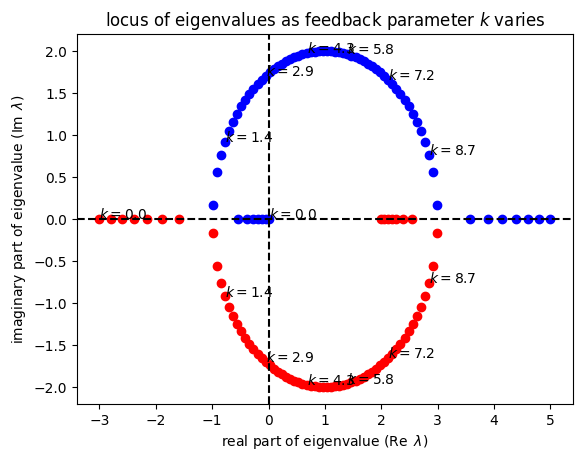

In [11]:
import numpy as np
import pylab as plt

# np.sqrt doesn't return complex numbers
# evaluating np.sqrt? brings up the "help", which points us to this replacement
sqrt = np.lib.scimath.sqrt

#Choosing values of k for annotation
K = np.linspace(0,10,70)
lambda1 = (-(3 - K) + sqrt(((3 - K)**2) - 4*K)) / 2
lambda2 = (-(3 - K) - sqrt(((3 - K)**2) - 4*K)) / 2

# confirm the non-real eigenvalues are complex-conjugates
assert np.allclose(lambda1[np.abs(lambda1.imag) > 0.],
                   np.conj(lambda2[np.abs(lambda1.imag) > 0]))

#Axis labels
plt.title('locus of eigenvalues as feedback parameter $k$ varies')
plt.xlabel(r'real part of eigenvalue ($\operatorname{Re}\ \lambda$)')
plt.ylabel(r'imaginary part of eigenvalue ($\operatorname{Im}\ \lambda$)')

#Plotting values
plt.scatter(lambda1.real,lambda1.imag,color='b')
plt.scatter(lambda2.real,lambda2.imag,color = 'r')
# we'll only annotate every 10 of the computed eigenvalues
for k,lam1,lam2 in list(zip(K,lambda1,lambda2))[::10]:
  plt.annotate(r'$k=%0.1f$'%k,xy=(lam1.real,lam1.imag))
  plt.annotate(r'$k=%0.1f$'%k,xy=(lam2.real,lam2.imag))
#x- and y- limits and drawing axes
ylim = plt.ylim()
plt.plot(np.zeros(2),ylim,'k--')
xlim = plt.xlim()
plt.plot(xlim,np.zeros(2),'k--')
plt.xlim(xlim); plt.ylim(ylim);

e. Is this closed loop system stable for all values of $k$? How can you tell from looking at the root-locus plot?

**Solution:**
No, this system is not stable for all values of $k$ because the roots do not always lie on the left side of the complex plane (i.e., have negative real part).

***Takeaway:*** this kind of plot is termed a ***root locus*** -- the eigenvalues are the *roots* of the characteristic polynomial $a(s)$ for $A$, and their plot is the *locus* of points that satisfy the homogenous equation $a(s) = 0$.